# Solar forecast

## Load necessary packages and pre-define functions

In [95]:
#!pip install pandas
#!pip install matplotlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#pip install requests
#!pip install suncalc
#!pip install pysolar
import requests
import json
from suncalc import get_position
import pytz
from pysolar.solar import *
from datetime import datetime, timedelta
import calendar

In [97]:
SOLAR_PATH = 'solar_forecast'
SOLAR_PATH = ''

In [98]:
pwd

'C:\\Users\\Gebruiker\\Documents\\solar_forecast'

In [99]:
# load csv
def load_solar_data(csvname, solar_path=SOLAR_PATH, sep=","):
        csv_path = os.path.join(solar_path, csvname)
        return pd.read_csv(csv_path, sep=sep)

## Load solar data

In [100]:
solgain_raw=load_solar_data('vermogen_n.csv', sep=';')

In [101]:
solgain_raw.head(40)

,Unnamed: 0,time,value
0,0,2023-07-27T19:19:52.178668Z,9.3
1,1,2023-07-27T19:24:56.217837Z,9.4
2,2,2023-07-27T22:50:38.333857Z,0.0
3,3,2023-07-27T23:39:01.443056Z,0.0
4,4,2023-07-27T23:53:01.479403Z,0.0
5,5,2023-07-28T01:02:20.350265Z,0.0
6,6,2023-07-28T05:59:59.688872Z,0.1
7,7,2023-07-28T06:34:39.694366Z,0.2
8,8,2023-07-28T06:54:58.811426Z,0.3
9,9,2023-07-28T07:12:35.009167Z,0.4


In [102]:
solgain_raw.describe()

,Unnamed: 0,value
count,22741.000000,22741.000000
mean,11370.000000,10.553001
std,6564.905572,8.872826
min,0.000000,0.000000
25%,5685.000000,3.100000
50%,11370.000000,8.400000
75%,17055.000000,16.200000
max,22740.000000,42.000000


## Preprocess the data

### Mean values per hour (to the next hour)

In [103]:
solgain_raw['time'] = pd.to_datetime(solgain_raw['time']) #, format='%d%b%Y:%H:%M:%S.%f'

In [104]:
solgain_raw['time']

0       2023-07-27 19:19:52.178668+00:00
1       2023-07-27 19:24:56.217837+00:00
2       2023-07-27 22:50:38.333857+00:00
3       2023-07-27 23:39:01.443056+00:00
4       2023-07-27 23:53:01.479403+00:00
                      ...               
22736   2024-01-25 17:14:00.696935+00:00
22737   2024-01-25 19:34:00.751655+00:00
22738   2024-01-25 21:53:53.726954+00:00
22739   2024-01-25 22:04:00.705628+00:00
22740   2024-01-25 22:34:00.746939+00:00
Name: time, Length: 22741, dtype: datetime64[ns, UTC]

In [105]:
solgain_agg_raw=solgain_raw.groupby((solgain_raw.time.dt.year-2023)*(365 + calendar.isleap(datetime.now().year-2))*24+solgain_raw.time.dt.day_of_year*24+solgain_raw.time.dt.hour)[['value']].max()

In [106]:
solgain_agg_raw.head(20)

,value
time,
5011,9.4
5014,0.0
5015,0.0
5017,0.0
5021,0.1
5022,0.3
5023,1.1
5024,2.8
5025,4.7


### remove NaNs

In [107]:
solgain_agg_raw.dropna(inplace=True)

### remove inconsistent jumps from solar opbrengst

In [108]:
jump=solgain_agg_raw.diff()
jump.dropna(inplace=True)
jump.drop(jump.index[jump.value>=0], inplace=True)
jump

,value
time,
5014,-9.4
5044,-22.1
5062,-29.9
5086,-22.1
5110,-7.3
...,...
9304,-5.0
9328,-5.6
9352,-6.5


In [109]:
solgain_agg_fix=solgain_agg_raw
for indexer in jump.index:
    print('Index : ', indexer)
    print('Value : ', jump.loc[indexer].value)
    solgain_agg_fix[solgain_agg_fix.index>=indexer]=solgain_agg_fix[solgain_agg_fix.index>=indexer]-jump.loc[indexer].value

Index :  5014
Value :  -9.4
Index :  5044
Value :  -22.099999999999998
Index :  5062
Value :  -29.9
Index :  5086
Value :  -22.1
Index :  5110
Value :  -7.3
Index :  5134
Value :  -24.2
Index :  5158
Value :  -20.8
Index :  5182
Value :  -14.8
Index :  5206
Value :  -33.1
Index :  5230
Value :  -15.9
Index :  5254
Value :  -12.1
Index :  5278
Value :  -28.9
Index :  5302
Value :  -20.4
Index :  5326
Value :  -39.4
Index :  5350
Value :  -42.0
Index :  5374
Value :  -32.5
Index :  5398
Value :  -27.4
Index :  5422
Value :  -27.1
Index :  5446
Value :  -39.1
Index :  5470
Value :  -33.6
Index :  5494
Value :  -21.7
Index :  5518
Value :  -12.7
Index :  5542
Value :  -24.9
Index :  5566
Value :  -19.8
Index :  5590
Value :  -35.2
Index :  5614
Value :  -35.9
Index :  5638
Value :  -28.8
Index :  5662
Value :  -37.3
Index :  5686
Value :  -17.8
Index :  5710
Value :  -9.1
Index :  5734
Value :  -28.6
Index :  5758
Value :  -23.9
Index :  5782
Value :  -15.1
Index :  5806
Value :  -17.5
Ind

In [110]:
solgain_agg_fix.head(30)

,value
time,
5011,9.4
5014,9.4
5015,9.4
5017,9.4
5021,9.5
5022,9.7
5023,10.5
5024,12.2
5025,14.1


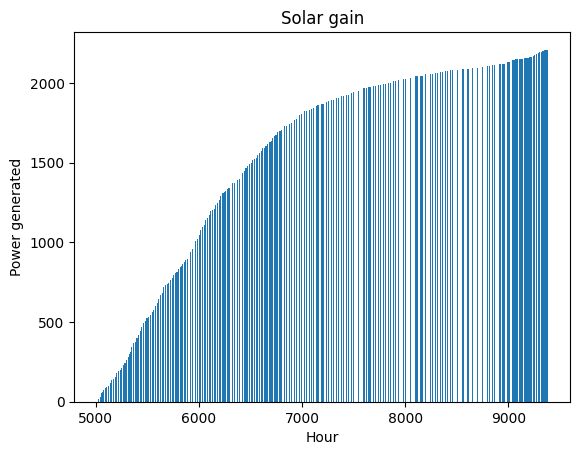

In [111]:
plt.bar(solgain_agg_fix.index.values,solgain_agg_fix.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### map to 24h and fill in blanks

In [112]:
mindex=solgain_agg_fix.index.min()

In [113]:
maxdex=solgain_agg_fix.index.max()

In [114]:
def map_df_24h(df_in, mindex=1, maxdex=24):
    df_int=pd.DataFrame(index=range(mindex,maxdex+1), columns=df_in.columns)
    for indexer in range(mindex, maxdex+1):
        ind_sel=max(df_in.index.values[df_in.index.values<=indexer])
        for name in list(df_in.columns): #df_in[df_in.index.values==ind_sel].mean().iteritems():
            #print(name)
            values=df_in[name].iloc[df_in.index.values==ind_sel].max()
            df_int[name].loc[[indexer]]=values
    return df_int

In [115]:
solgain_agg_fix_int=map_df_24h(solgain_agg_fix, mindex,maxdex)

In [116]:
solgain_agg_fix_int.iloc[0:20]

,value
5011,9.4
5012,9.4
5013,9.4
5014,9.4
5015,9.4
5016,9.4
5017,9.4
5018,9.4
5019,9.4
5020,9.4


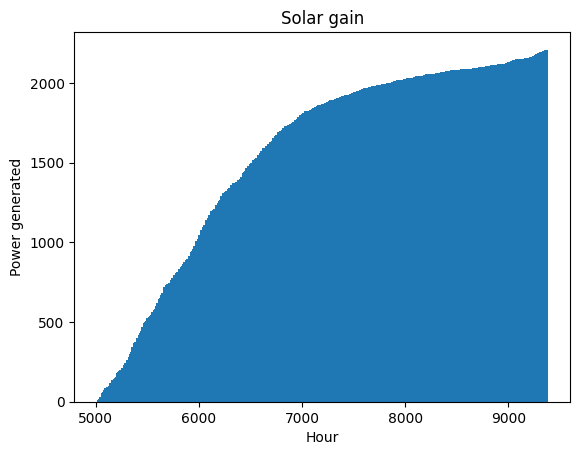

In [117]:
plt.bar(solgain_agg_fix_int.index.values,solgain_agg_fix_int.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### differential for solar power

In [118]:
solgain_agg_fix_int_dv=solgain_agg_fix_int.diff()

In [119]:
solgain_agg_fix_int_dv.head(20)

,value
5011,NaN
5012,0.0
5013,0.0
5014,0.0
5015,0.0
5016,0.0
5017,0.0
5018,0.0
5019,0.0
5020,0.0


In [120]:
solgain_agg_fix_int_dv.value
solgain_agg_fix_int_dv.drop(mindex, inplace=True)

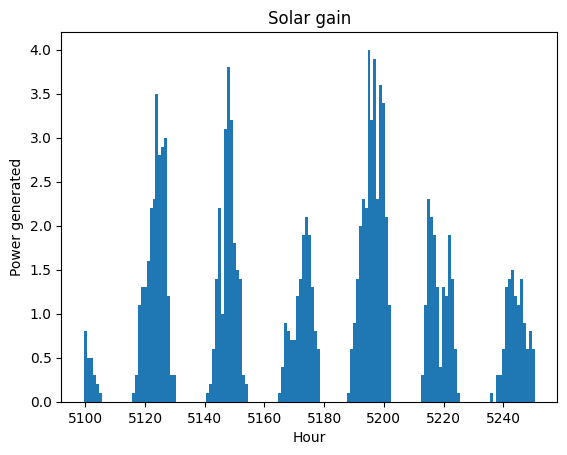

In [121]:
plt.bar(solgain_agg_fix_int_dv.loc[5100:5250].index.values,solgain_agg_fix_int_dv.loc[5100:5250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

Solar gain is expected for the current hour (e.g for hour 8 it is what is expected to be produced between 8 and 8:59). Nota bene: Timezone is UTC!

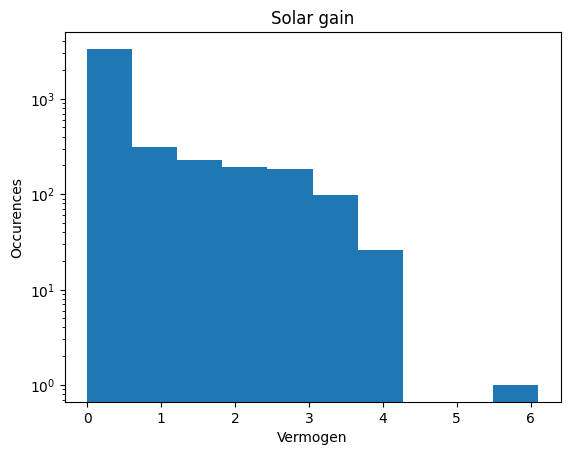

In [122]:
plt.hist(solgain_agg_fix_int_dv.value.values, log=True)
plt.xlabel("Vermogen")
plt.ylabel("Occurences")
plt.title("Solar gain")
plt.show()

In [123]:
np.sort(solgain_agg_fix_int_dv.value.values)[::-1]

array([6.100000000000364, 4.100000000000023, 4.100000000000023, ...,
       -4.547473508864641e-13, -4.547473508864641e-13,
       -4.547473508864641e-13], dtype=object)

In [124]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv[solgain_agg_fix_int_dv.value.values<4.5] #physically not possible to have more than 4.5 kWh

### Get historical weather data

In [125]:
parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "start_date": '2023-07-27',
    "end_date": '2024-01-25',
    "hourly": ['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0_to_7cm', 'snow_depth'],
}

In [126]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive",params=parameters)
weather_agg_int=pd.DataFrame(response.json()['hourly'])

In [127]:
weather_agg_int.tail(50)

,time,direct_normal_irradiance,diffuse_radiation,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth
4342,2024-01-23T22:00,0.0,0.0,100,11,100,8.8,0.0
4343,2024-01-23T23:00,0.0,0.0,100,21,100,9.2,0.0
4344,2024-01-24T00:00,0.0,0.0,100,100,100,9.4,0.0
4345,2024-01-24T01:00,0.0,0.0,100,100,100,9.5,0.0
4346,2024-01-24T02:00,0.0,0.0,100,31,100,9.6,0.0
4347,2024-01-24T03:00,0.0,0.0,100,6,100,9.6,0.0
4348,2024-01-24T04:00,0.0,0.0,93,19,100,9.6,0.0
4349,2024-01-24T05:00,0.0,0.0,100,2,70,9.3,0.0
4350,2024-01-24T06:00,0.0,0.0,99,0,87,9.1,0.0
4351,2024-01-24T07:00,0.0,0.0,42,0,100,8.8,0.0


In [128]:
# date time and merge
weather_agg_int['time_']=weather_agg_int['time']
weather_agg_int['time'] = pd.to_datetime(weather_agg_int['time'])
weather_agg_int['time']=(weather_agg_int.time.dt.year-2023)*(365 + calendar.isleap(datetime.now().year-2))*24+weather_agg_int.time.dt.day_of_year*24+weather_agg_int.time.dt.hour
weather_agg_int.set_index('time', inplace=True)

In [129]:
solgain_agg_fix_int_dv.index

Index([5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021,
       ...
       9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382],
      dtype='int64', length=4370)

In [130]:
# make 2 versions at begin and end of interval
weather_agg_int_1=weather_agg_int.loc[solgain_agg_fix_int_dv.index]
weather_agg_int_2=weather_agg_int.loc[solgain_agg_fix_int_dv.index+1]
weather_agg_int_2.index=weather_agg_int_1.index

In [131]:
# precipitation is preceeding hour, others are instant --> average over interval
weather_agg_int=weather_agg_int_2
weather_agg_int.time_=weather_agg_int_1.time_
weather_agg_int.cloud_cover_low=(weather_agg_int_1.cloud_cover_low+weather_agg_int_2.cloud_cover_low)/2
weather_agg_int.cloud_cover_mid=(weather_agg_int_1.cloud_cover_mid+weather_agg_int_2.cloud_cover_mid)/2
weather_agg_int.cloud_cover_high=(weather_agg_int_1.cloud_cover_high+weather_agg_int_2.cloud_cover_high)/2
weather_agg_int.soil_temperature_0_to_7cm=(weather_agg_int_1.soil_temperature_0_to_7cm+weather_agg_int_2.soil_temperature_0_to_7cm)/2
weather_agg_int.snow_depth=(weather_agg_int_1.snow_depth+weather_agg_int_2.snow_depth)/2

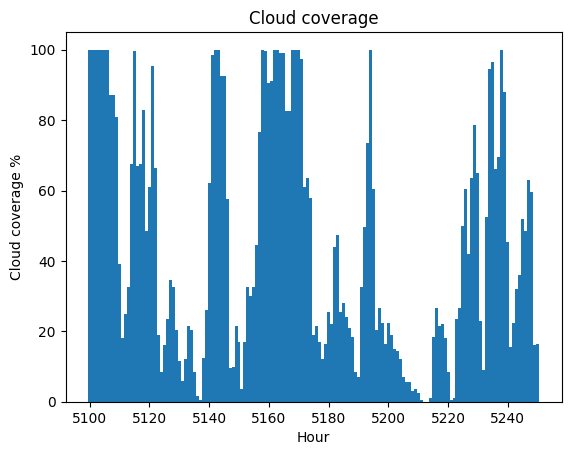

In [132]:
plt.bar(weather_agg_int.loc[5100:5250].index.values,weather_agg_int.loc[5100:5250].cloud_cover_low.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Cloud coverage %")
plt.title("Cloud coverage")
plt.show()

In [133]:
# eliminate NaNs and negative snow depths
weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]=0

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20220\3498296554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20220\3498296554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]=0


In [134]:
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]
sum(np.isnan(weather_agg_int.snow_depth))

0

### Get historical sun data

In [135]:
datelist=list(map(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M')+timedelta(minutes=30), weather_agg_int.time_)) # half hour later for our interval
datelist

[datetime.datetime(2023, 7, 27, 20, 30),
 datetime.datetime(2023, 7, 27, 21, 30),
 datetime.datetime(2023, 7, 27, 22, 30),
 datetime.datetime(2023, 7, 27, 23, 30),
 datetime.datetime(2023, 7, 28, 0, 30),
 datetime.datetime(2023, 7, 28, 1, 30),
 datetime.datetime(2023, 7, 28, 2, 30),
 datetime.datetime(2023, 7, 28, 3, 30),
 datetime.datetime(2023, 7, 28, 4, 30),
 datetime.datetime(2023, 7, 28, 5, 30),
 datetime.datetime(2023, 7, 28, 6, 30),
 datetime.datetime(2023, 7, 28, 7, 30),
 datetime.datetime(2023, 7, 28, 8, 30),
 datetime.datetime(2023, 7, 28, 9, 30),
 datetime.datetime(2023, 7, 28, 10, 30),
 datetime.datetime(2023, 7, 28, 11, 30),
 datetime.datetime(2023, 7, 28, 12, 30),
 datetime.datetime(2023, 7, 28, 13, 30),
 datetime.datetime(2023, 7, 28, 14, 30),
 datetime.datetime(2023, 7, 28, 15, 30),
 datetime.datetime(2023, 7, 28, 16, 30),
 datetime.datetime(2023, 7, 28, 17, 30),
 datetime.datetime(2023, 7, 28, 18, 30),
 datetime.datetime(2023, 7, 28, 19, 30),
 datetime.datetime(2023, 7

In [136]:
#suncalc needs UTC time
def sun_utc(x,par='azimuth'):
    #local = pytz.timezone("Europe/Berlin")
    #local_dt=local.localize(x, is_dst=None)
    utc_dt=pytz.utc.localize(x)
    if par=='azimuth':
        out=get_azimuth(parameters['latitude'],parameters['longitude'],utc_dt)
    else:
        out=get_altitude(parameters['latitude'],parameters['longitude'],utc_dt)             
    return out


azimuth=list(map(lambda x: sun_utc(x,par='azimuth'), datelist))
altitude=list(map(lambda x: sun_utc(x,par='altitude'), datelist))

In [139]:
# dataframe
sun_agg_int=pd.DataFrame({'time': weather_agg_int.time_,
                         'azimuth': azimuth,
                         'altitude': altitude})

In [140]:
# date time and merge
sun_agg_int['time'] = pd.to_datetime(sun_agg_int['time'])
sun_agg_int['time']=(sun_agg_int.time.dt.year-2023)*(365 + calendar.isleap(datetime.now().year-2))*24+sun_agg_int.time.dt.day_of_year*24+sun_agg_int.time.dt.hour
sun_agg_int.set_index('time', inplace=True)
sun_agg_int=sun_agg_int.loc[solgain_agg_fix_int_dv.index]

In [141]:
sun_agg_int

,azimuth,altitude
5012,313.844072,-7.484023
5013,326.911910,-13.468578
5014,340.986994,-17.595535
5015,355.803735,-19.492091
5016,10.805948,-18.960786
...,...,...
9378,264.950931,-20.488476
9379,276.758565,-29.835716
9380,289.984917,-38.931978
9381,305.830436,-47.200763


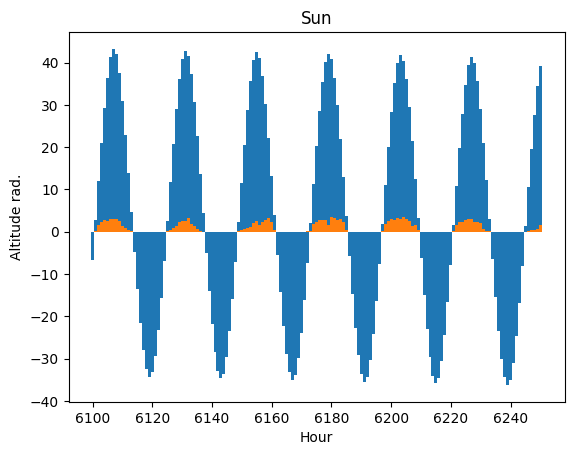

In [142]:
plt.bar(sun_agg_int.loc[6100:6250].index.values,sun_agg_int.loc[6100:6250].altitude.values, width=1)
plt.bar(solgain_agg_fix_int_dv.loc[6100:6250].index.values,solgain_agg_fix_int_dv.loc[6100:6250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Altitude rad.")
plt.title("Sun")
plt.show()

#### calculate angle of incidence per plane

In [143]:
# definition of variables
a_m=45 # altitude panel
a_s=sun_agg_int.altitude.values # altitude sun
A_m_1=77 # Azimuth module 1
A_m_2=257 # Azimuth module 2
A_s=sun_agg_int.azimuth.values # Azimuth sun
sun_agg_int=sun_agg_int.assign(AOI_1=np.arccos(np.cos(a_m/180*np.pi)*np.cos(a_s/180*np.pi)*np.cos((A_m_1-A_s)/180*np.pi)+np.sin(a_m/180*np.pi)*np.sin(a_s/180*np.pi))*180/np.pi)
sun_agg_int=sun_agg_int.assign(AOI_2=np.arccos(np.cos(a_m/180*np.pi)*np.cos(a_s/180*np.pi)*np.cos((A_m_2-A_s)/180*np.pi)+np.sin(a_m/180*np.pi)*np.sin(a_s/180*np.pi))*180/np.pi)


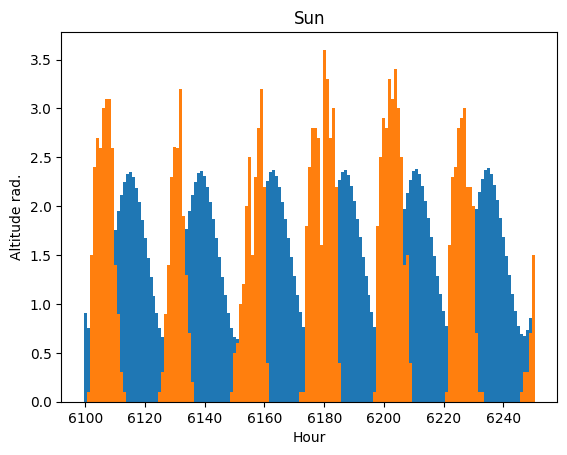

In [144]:
plt.bar(sun_agg_int.loc[6100:6250].index.values, sun_agg_int.loc[6100:6250].AOI_1.values/180*np.pi, width=1)
plt.bar(solgain_agg_fix_int_dv.loc[6100:6250].index.values,solgain_agg_fix_int_dv.loc[6100:6250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Altitude rad.")
plt.title("Sun")
plt.show()

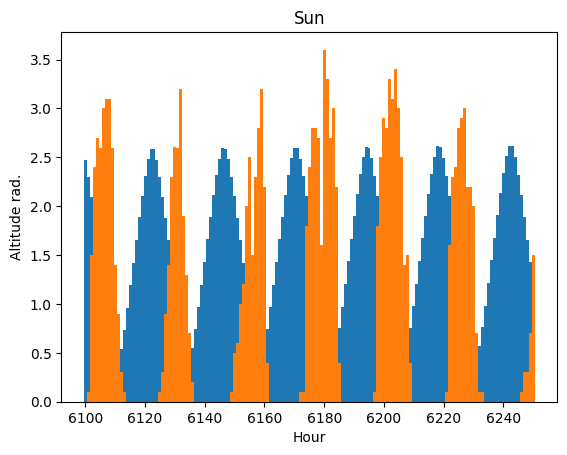

In [145]:
plt.bar(sun_agg_int.loc[6100:6250].index.values, sun_agg_int.loc[6100:6250].AOI_2.values/180*np.pi, width=1)
plt.bar(solgain_agg_fix_int_dv.loc[6100:6250].index.values,solgain_agg_fix_int_dv.loc[6100:6250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Altitude rad.")
plt.title("Sun")
plt.show()

### Remove night data to better balance

In [146]:
index_night=sun_agg_int.index[sun_agg_int.altitude>0]

In [147]:
sun_agg_int=sun_agg_int.loc[index_night]

In [148]:
weather_agg_int=weather_agg_int.loc[index_night]

In [149]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_night]

In [150]:
index_pos=(solgain_agg_fix_int_dv.value>0.01) & (solgain_agg_fix_int_dv.value<=4.5)

In [151]:
sun_agg_int=sun_agg_int.loc[index_pos]

In [152]:
weather_agg_int=weather_agg_int.loc[index_pos]

In [153]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_pos]

In [154]:
solgain_agg_fix_int_dv.value.min()

0.09999999999990905

## Prepare ML pipeline

### Load functions

In [155]:
#!pip install xgboost
#!pip install sklearn
!pip3 install scikit-learn==1.5.2
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import xgboost
from scipy import stats

### combine dataframes

In [156]:
weather_agg_int.drop('time_', axis=1,inplace=True)

In [157]:
data_comb=solgain_agg_fix_int_dv.join(sun_agg_int).join(weather_agg_int)

In [158]:
# calculate the direct global irradiation and diffuse irradiation per plane
G_direct_1 = data_comb.direct_normal_irradiance*np.cos(data_comb.AOI_1*np.pi/180)
G_direct_2 = data_comb.direct_normal_irradiance*np.cos(data_comb.AOI_2*np.pi/180)
G_diff = data_comb.diffuse_radiation*(1+np.cos(45*np.pi/180))/2
data_comb=data_comb.assign(G_direct=G_direct_1+G_direct_2)
data_comb=data_comb.assign(G_diff=G_diff)

In [159]:
data_comb = data_comb.astype(float)

In [160]:
data_comb=data_comb.drop(['diffuse_radiation', 'direct_normal_irradiance', 'azimuth', 'altitude', 'AOI_1', 'AOI_2'], axis=1)

### split train and test set

In [161]:
train_set, test_set = train_test_split(data_comb, test_size=0.3, random_state=42)

### look for correlations

In [162]:
corr_matrix = data_comb.corr()

In [163]:
corr_matrix

,value,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,G_direct,G_diff
value,1.000000,-0.387573,-0.387329,-0.192309,0.601445,-0.129666,0.824685,0.547028
cloud_cover_low,-0.387573,1.000000,0.311794,0.074848,-0.306798,0.007992,-0.415033,-0.025384
cloud_cover_mid,-0.387329,0.311794,1.000000,0.339491,-0.217836,0.028019,-0.409781,-0.068229
cloud_cover_high,-0.192309,0.074848,0.339491,1.000000,-0.014405,-0.013952,-0.257428,0.131700
soil_temperature_0_to_7cm,0.601445,-0.306798,-0.217836,-0.014405,1.000000,-0.386094,0.504949,0.438372
snow_depth,-0.129666,0.007992,0.028019,-0.013952,-0.386094,1.000000,-0.079645,-0.109242
G_direct,0.824685,-0.415033,-0.409781,-0.257428,0.504949,-0.079645,1.000000,0.366871
G_diff,0.547028,-0.025384,-0.068229,0.131700,0.438372,-0.109242,0.366871,1.000000


array([[<Axes: xlabel='value', ylabel='value'>,
        <Axes: xlabel='cloud_cover_low', ylabel='value'>,
        <Axes: xlabel='cloud_cover_mid', ylabel='value'>,
        <Axes: xlabel='cloud_cover_high', ylabel='value'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='value'>,
        <Axes: xlabel='snow_depth', ylabel='value'>,
        <Axes: xlabel='G_direct', ylabel='value'>,
        <Axes: xlabel='G_diff', ylabel='value'>],
       [<Axes: xlabel='value', ylabel='cloud_cover_low'>,
        <Axes: xlabel='cloud_cover_low', ylabel='cloud_cover_low'>,
        <Axes: xlabel='cloud_cover_mid', ylabel='cloud_cover_low'>,
        <Axes: xlabel='cloud_cover_high', ylabel='cloud_cover_low'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='cloud_cover_low'>,
        <Axes: xlabel='snow_depth', ylabel='cloud_cover_low'>,
        <Axes: xlabel='G_direct', ylabel='cloud_cover_low'>,
        <Axes: xlabel='G_diff', ylabel='cloud_cover_low'>],
       [<Axes: xlabel='value',

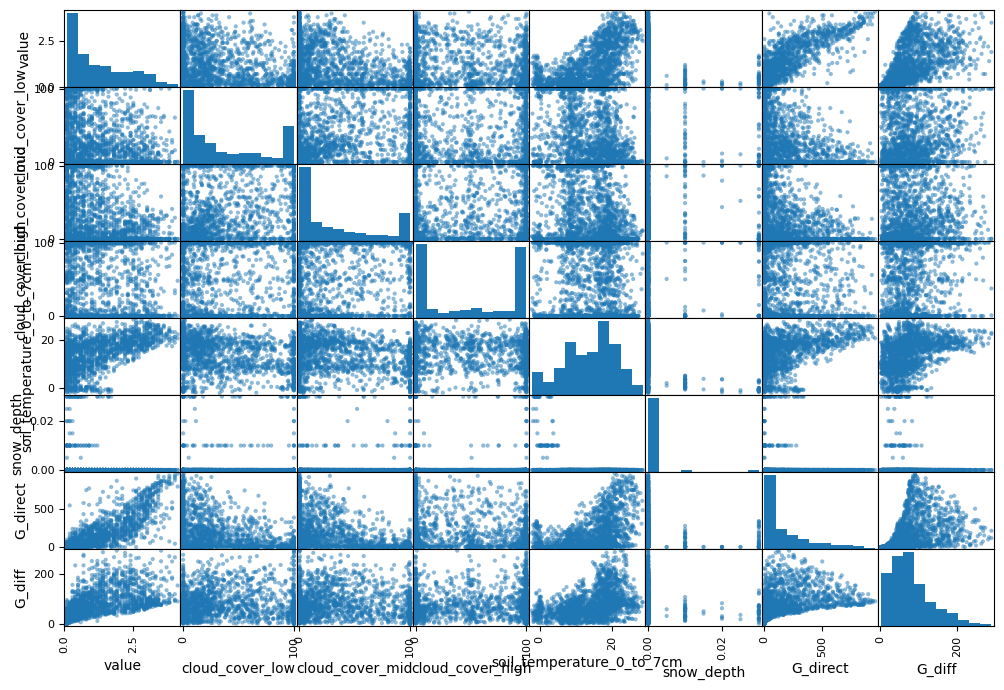

In [164]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_comb, figsize=(12,8))

### feature scaling

In [165]:
variables=train_set.drop('value', axis=1)
variables_test=test_set.drop('value', axis=1)
outcome=train_set["value"].copy()
outcome_test=test_set["value"].copy()

In [166]:
outcome

5669    0.7
8411    0.3
5153    0.3
8384    0.1
6923    2.3
       ... 
7237    1.4
7691    0.3
6592    1.2
8220    0.1
7233    1.0
Name: value, Length: 1250, dtype: float64

In [167]:
scale=StandardScaler()
variables_sc=pd.DataFrame(scale.fit_transform(variables),columns=variables.columns,index=variables.index)
variables_test_sc=pd.DataFrame(scale.transform(variables_test),columns=variables_test.columns,index=variables_test.index)

In [168]:
variables_test_sc

,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,G_direct,G_diff
5960,-1.018612,-0.924340,-1.132192,0.709852,-0.189112,1.757484,-0.257726
7282,-0.963493,1.247485,1.185840,-0.236074,-0.189112,-0.705856,0.666818
7858,1.737344,-0.869007,-1.085831,-0.694484,-0.189112,-0.791170,-0.041999
5505,1.737344,-0.924340,1.151070,0.906314,-0.189112,-0.451253,3.039816
9321,-1.018612,-0.384842,-0.065897,-1.356633,-0.189112,0.022477,-0.658362
...,...,...,...,...,...,...,...
8192,0.648741,-0.025177,0.281808,-1.960570,2.009864,-0.804861,-0.904907
5933,-1.018612,-0.924340,1.185840,0.098638,-0.189112,-0.740445,-1.089816
5913,-1.018612,-0.924340,0.988807,0.746234,-0.189112,2.338024,0.127501
5150,-0.550100,1.109153,-1.132192,0.957248,-0.189112,0.182033,2.485089


### fit decision tree regressor

In [169]:
param_grid = [
    {'bootstrap': [True], 'n_estimators': [10, 50, 100, 200, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'max_leaf_nodes': [64, 128, 256], 'n_jobs':[-1]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 200, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'max_leaf_nodes': [64, 128, 256], 'n_jobs': [-1]},
]
forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(variables_sc, outcome)
#forest_reg.fit(variables_sc, outcome)

KeyboardInterrupt: 

In [170]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [171]:
#forest_reg_best=grid_search.best_estimator_
forest_reg_best=RandomForestRegressor(bootstrap=True, max_features = 2 , max_leaf_nodes = 256, n_estimators=200, n_jobs=-1)
forest_reg_best.fit(variables_sc,outcome)

RandomForestRegressor(max_features=2, max_leaf_nodes=256, n_estimators=200,
                      n_jobs=-1)

In [172]:
predictions=forest_reg_best.predict(variables_test_sc)
forest_mse=mean_squared_error(predictions, outcome_test)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.4562680470448398

In [173]:
confidence = 0.95
squared_errors = (predictions-outcome_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.40937536, 0.49877137])

In [174]:
predictions[32]

0.5334388195043054

In [175]:
outcome_test.iloc[32]

0.40000000000009095

In [176]:
predictions.min()

0.16962679528968005

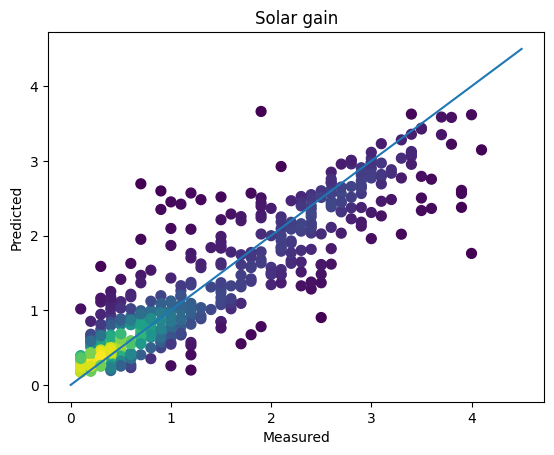

In [177]:
from scipy.stats import gaussian_kde
x=outcome_test
y=predictions
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot([0, 4.5], [0, 4.5])
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Solar gain")
plt.show()

In [178]:
r2_score(outcome_test, predictions)

0.8188102224249522

In [179]:
feature_importances=forest_reg_best.feature_importances_
sorted(zip(variables_sc.columns, feature_importances), reverse=True)

[('soil_temperature_0_to_7cm', 0.17589414604711862),
 ('snow_depth', 0.002517119263903275),
 ('cloud_cover_mid', 0.06796831298872),
 ('cloud_cover_low', 0.06877511540410265),
 ('cloud_cover_high', 0.04258739388612733),
 ('G_direct', 0.42356282604237083),
 ('G_diff', 0.21869508636765725)]

## Forecast via API

### Final model

In [180]:
forest_reg_best=RandomForestRegressor(bootstrap=True, max_features = 2 , max_leaf_nodes = 256, n_estimators=200, n_jobs=-1)
forest_reg_best.fit(variables_sc,outcome)

RandomForestRegressor(max_features=2, max_leaf_nodes=256, n_estimators=200,
                      n_jobs=-1)

In [181]:
scale=StandardScaler()
scale.fit(variables)

StandardScaler()

deploy model

In [182]:
from joblib import dump , load

## dump your model
sol_pred_mod = dump(forest_reg_best, 'sol_pred_mod.gz')
weather_scl = dump(scale, 'weather_scl.gz')

In [183]:
sol_pred_mod 

['sol_pred_mod.gz']

In [184]:
weather_scl

['weather_scl.gz']

### Weather forecast

In [185]:
parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "hourly": ['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0cm', 'snow_depth'],
}

In [186]:
response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

In [187]:
test={"parameters":parameters}
print(test["parameters"])

{'latitude': 51.3225, 'longitude': 4.9447, 'hourly': ['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0cm', 'snow_depth']}


In [188]:
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int.time.dt.year

0      2025
1      2025
2      2025
3      2025
4      2025
       ... 
163    2025
164    2025
165    2025
166    2025
167    2025
Name: time, Length: 168, dtype: int32

In [189]:
def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2023)

365

In [190]:
# date time and merge
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int['time']=(weather_fc_int.time.dt.year-2023)*days_in_year()*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

In [191]:
weather_fc_int.index

Index([21336, 21337, 21338, 21339, 21340, 21341, 21342, 21343, 21344, 21345,
       ...
       21494, 21495, 21496, 21497, 21498, 21499, 21500, 21501, 21502, 21503],
      dtype='int32', name='time', length=168)

In [192]:
weather_fc_int.columns

Index(['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0cm',
       'snow_depth', 'time_'],
      dtype='object')

In [193]:
weather_fc_int.columns=['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm',
       'snow_depth', 'time_']

In [194]:
weather_fc_int.columns

Index(['direct_normal_irradiance', 'diffuse_radiation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm',
       'snow_depth', 'time_'],
      dtype='object')

In [195]:
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

In [196]:
# precipitation is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

In [197]:
weather_fc_int.snow_depth

time
21336    0.0
21337    0.0
21338    0.0
21339    0.0
21340    0.0
        ... 
21498    0.0
21499    0.0
21500    0.0
21501    0.0
21502    0.0
Name: snow_depth, Length: 167, dtype: float64

### Sun forecast

In [198]:
suntimeutc=pd.to_datetime(weather_fc_int.time_).dt.tz_localize('UTC').dt.tz_convert('UTC').dt.strftime('%Y-%m-%dT%H:%M') # need to convert to utc
suntimeutc

time
21336    2025-06-08T00:00
21337    2025-06-08T01:00
21338    2025-06-08T02:00
21339    2025-06-08T03:00
21340    2025-06-08T04:00
               ...       
21498    2025-06-14T18:00
21499    2025-06-14T19:00
21500    2025-06-14T20:00
21501    2025-06-14T21:00
21502    2025-06-14T22:00
Name: time_, Length: 167, dtype: object

In [199]:
datelist=list(map(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M')+timedelta(minutes=30), suntimeutc)) # half hour later for our interval
datelist

[datetime.datetime(2025, 6, 8, 0, 30),
 datetime.datetime(2025, 6, 8, 1, 30),
 datetime.datetime(2025, 6, 8, 2, 30),
 datetime.datetime(2025, 6, 8, 3, 30),
 datetime.datetime(2025, 6, 8, 4, 30),
 datetime.datetime(2025, 6, 8, 5, 30),
 datetime.datetime(2025, 6, 8, 6, 30),
 datetime.datetime(2025, 6, 8, 7, 30),
 datetime.datetime(2025, 6, 8, 8, 30),
 datetime.datetime(2025, 6, 8, 9, 30),
 datetime.datetime(2025, 6, 8, 10, 30),
 datetime.datetime(2025, 6, 8, 11, 30),
 datetime.datetime(2025, 6, 8, 12, 30),
 datetime.datetime(2025, 6, 8, 13, 30),
 datetime.datetime(2025, 6, 8, 14, 30),
 datetime.datetime(2025, 6, 8, 15, 30),
 datetime.datetime(2025, 6, 8, 16, 30),
 datetime.datetime(2025, 6, 8, 17, 30),
 datetime.datetime(2025, 6, 8, 18, 30),
 datetime.datetime(2025, 6, 8, 19, 30),
 datetime.datetime(2025, 6, 8, 20, 30),
 datetime.datetime(2025, 6, 8, 21, 30),
 datetime.datetime(2025, 6, 8, 22, 30),
 datetime.datetime(2025, 6, 8, 23, 30),
 datetime.datetime(2025, 6, 9, 0, 30),
 datetime.d

In [200]:
#suncalc needs UTC time
def sun_utc(x,par='azimuth'):
    #local = pytz.timezone("Europe/Berlin")
    #local_dt=local.localize(x, is_dst=None)
    utc_dt=pytz.utc.localize(x)
    if par=='azimuth':
        out=get_azimuth(parameters['latitude'],parameters['longitude'],utc_dt)
    else:
        out=get_altitude(parameters['latitude'],parameters['longitude'],utc_dt)             
    return out


azimuth_fc=list(map(lambda x: sun_utc(x,par='azimuth'), datelist))
altitude_fc=list(map(lambda x: sun_utc(x,par='altitude'), datelist))

C:\Users\Gebruiker\anaconda3\envs\datascience\Lib\site-packages\pysolar\solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \


In [201]:
# dataframe
sun_fc_int=pd.DataFrame({'time': weather_fc_int.time_,
                         'azimuth': azimuth_fc,
                         'altitude': altitude_fc})

In [202]:
# date time and merge
sun_fc_int['time'] = pd.to_datetime(sun_fc_int['time'])
sun_fc_int['time']=(sun_fc_int.time.dt.year-2023)*24*days_in_year()+sun_fc_int.time.dt.day_of_year*24+sun_fc_int.time.dt.hour
sun_fc_int.set_index('time', inplace=True)

In [203]:
sun_fc_int

,azimuth,altitude
time,,
21336,12.101950,-14.993187
21337,25.957692,-11.932204
21338,39.002282,-6.896009
21339,51.149018,0.254232
21340,62.553356,7.694950
...,...,...
21498,294.059755,10.800312
21499,305.254177,2.827526
21500,317.090723,-4.464836


#### Calculate AOI etc.

In [204]:
# definition of variables
a_m=45 # altitude panel
a_s=sun_fc_int.altitude.values # altitude sun
A_m_1=77 # Azimuth module 1
A_m_2=257 # Azimuth module 2
A_s=sun_fc_int.azimuth.values # Azimuth sun
sun_fc_int=sun_fc_int.assign(AOI_1=np.arccos(np.cos(a_m/180*np.pi)*np.cos(a_s/180*np.pi)*np.cos((A_m_1-A_s)/180*np.pi)+np.sin(a_m/180*np.pi)*np.sin(a_s/180*np.pi))*180/np.pi)
sun_fc_int=sun_fc_int.assign(AOI_2=np.arccos(np.cos(a_m/180*np.pi)*np.cos(a_s/180*np.pi)*np.cos((A_m_2-A_s)/180*np.pi)+np.sin(a_m/180*np.pi)*np.sin(a_s/180*np.pi))*180/np.pi)

### Merge and prep

In [205]:
weather_fc_int.drop('time_', axis=1,inplace=True)

In [206]:
data_fc_comb=sun_fc_int.join(weather_fc_int)

In [207]:
data_fc_comb = data_fc_comb.astype(float)

In [208]:
# calculate the direct global irradiation and diffuse irradiation per plane
G_direct_1 = data_fc_comb.direct_normal_irradiance*np.cos(data_fc_comb.AOI_1*np.pi/180)
G_direct_2 = data_fc_comb.direct_normal_irradiance*np.cos(data_fc_comb.AOI_2*np.pi/180)
G_diff = data_fc_comb.diffuse_radiation*(1+np.cos(45*np.pi/180))/2
data_fc_comb=data_fc_comb.assign(G_direct=G_direct_1+G_direct_2)
data_fc_comb=data_fc_comb.assign(G_diff=G_diff)

In [209]:
data_fc_comb=data_fc_comb.drop(['diffuse_radiation', 'direct_normal_irradiance', 'azimuth', 'AOI_1', 'AOI_2'], axis=1)

In [210]:
data_fc_comb_sc=pd.DataFrame(scale.transform(data_fc_comb.drop(['altitude'], axis=1)),columns=data_fc_comb.drop(['altitude'], axis=1).columns,index=data_fc_comb.index)

### Predict

In [211]:
data_fc_comb_sc[data_fc_comb.altitude>0]

,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,G_direct,G_diff
time,,,,,,,
21339,1.737344,0.458988,-1.062651,-0.403430,-0.189112,-0.810980,-1.413407
21340,1.737344,0.458988,-1.062651,-0.388878,-0.189112,-0.800767,-0.944971
21341,1.737344,-0.799840,-1.132192,-0.337943,-0.189112,-0.579402,0.090519
21342,0.662521,-0.799840,-1.132192,-0.243350,-0.189112,0.021489,0.938018
21343,0.662521,-0.924340,-1.132192,-0.090547,-0.189112,-0.206510,1.676113
...,...,...,...,...,...,...,...
21495,-1.018612,-0.924340,-0.830848,2.732679,-0.189112,1.335289,1.491204
21496,-1.018612,-0.924340,-0.784487,2.565323,-0.189112,0.640448,1.021227
21497,-1.018612,-0.924340,-0.749716,2.368861,-0.189112,-0.046757,0.471123


In [212]:
predictions=forest_reg_best.predict(data_fc_comb_sc[data_fc_comb.altitude>0])

In [213]:
data_fc_comb.index

Index([21336, 21337, 21338, 21339, 21340, 21341, 21342, 21343, 21344, 21345,
       ...
       21493, 21494, 21495, 21496, 21497, 21498, 21499, 21500, 21501, 21502],
      dtype='int32', name='time', length=167)

In [214]:
df_fc=pd.DataFrame(0, columns=['Time','ForeCast'], index=data_fc_comb.index)

In [215]:
df_fc.ForeCast[data_fc_comb.altitude>0]=predictions

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20220\350599859.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.20429489 0.2438135  0.5756249  1.50615487 1.80301788 1.53168196
 1.49184075 1.72833774 1.88871479 1.6925478  2.7969738  2.56780862
 2.13090024 1.35980199 1.79018608 1.10601827 0.19121731 0.17229092
 0.69014632 1.25938951 1.91697009 2.35714417 2.66558584 2.40959808
 2.35830306 1.74009475 1.47893095 1.51154159 2.61184627 1.51901535
 1.5276717  1.28788039 0.29134191 0.20767568 0.1901953  0.4408304
 0.98857729 1.5847704  2.15574636 2.30578291 2.60783405 2.03326845
 1.29211754 1.42502587 1.82061687 1.714615   1.95853937 1.29913755
 0.78130788 0.37192873 0.27717377 0.18415957 0.44493258 1.15016634
 1.49357541 2.23102182 1.91731674 1.9302213  2.21542051 2.25131067
 2.14486833 2.30436819 2.50978147 2.38399795 1.97222548 1.85740034
 1.01198682 0.22318497 0.17577394 0.8464327  1.5959554  2.1767839
 2.4930008

In [216]:
df_fc.Time=weather_fc_int_1.time_

In [217]:
df_fc.head(48)

,Time,ForeCast
time,,
21336,2025-06-08 00:00:00,0.000000
21337,2025-06-08 01:00:00,0.000000
21338,2025-06-08 02:00:00,0.000000
21339,2025-06-08 03:00:00,0.204295
21340,2025-06-08 04:00:00,0.243814
21341,2025-06-08 05:00:00,0.575625
21342,2025-06-08 06:00:00,1.506155
21343,2025-06-08 07:00:00,1.803018
21344,2025-06-08 08:00:00,1.531682


In [218]:
list(df_fc.Time.dt.strftime('%Y-%m-%dT%H:%M:%S%z+00:00').values)

['2025-06-08T00:00:00+00:00',
 '2025-06-08T01:00:00+00:00',
 '2025-06-08T02:00:00+00:00',
 '2025-06-08T03:00:00+00:00',
 '2025-06-08T04:00:00+00:00',
 '2025-06-08T05:00:00+00:00',
 '2025-06-08T06:00:00+00:00',
 '2025-06-08T07:00:00+00:00',
 '2025-06-08T08:00:00+00:00',
 '2025-06-08T09:00:00+00:00',
 '2025-06-08T10:00:00+00:00',
 '2025-06-08T11:00:00+00:00',
 '2025-06-08T12:00:00+00:00',
 '2025-06-08T13:00:00+00:00',
 '2025-06-08T14:00:00+00:00',
 '2025-06-08T15:00:00+00:00',
 '2025-06-08T16:00:00+00:00',
 '2025-06-08T17:00:00+00:00',
 '2025-06-08T18:00:00+00:00',
 '2025-06-08T19:00:00+00:00',
 '2025-06-08T20:00:00+00:00',
 '2025-06-08T21:00:00+00:00',
 '2025-06-08T22:00:00+00:00',
 '2025-06-08T23:00:00+00:00',
 '2025-06-09T00:00:00+00:00',
 '2025-06-09T01:00:00+00:00',
 '2025-06-09T02:00:00+00:00',
 '2025-06-09T03:00:00+00:00',
 '2025-06-09T04:00:00+00:00',
 '2025-06-09T05:00:00+00:00',
 '2025-06-09T06:00:00+00:00',
 '2025-06-09T07:00:00+00:00',
 '2025-06-09T08:00:00+00:00',
 '2025-06-

In [219]:
["2023-12-29T09:00:00+00:00", "2023-12-29T10:00:00+00:00", "2023-12-30T12:00:00+00:00"]

['2023-12-29T09:00:00+00:00',
 '2023-12-29T10:00:00+00:00',
 '2023-12-30T12:00:00+00:00']

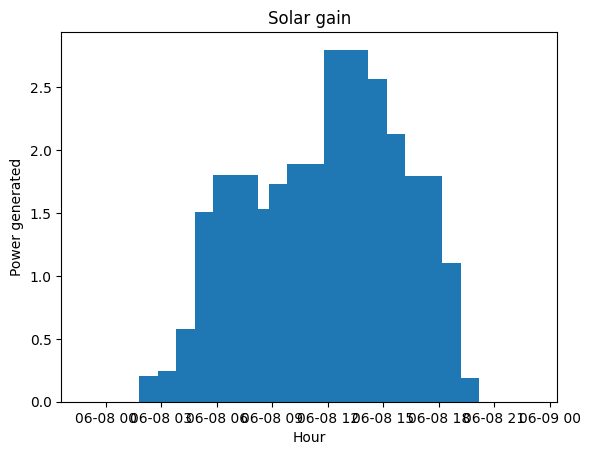

In [220]:
plt.bar(df_fc.Time.iloc[0:23].values,df_fc.ForeCast.iloc[0:23].values, width=0.1)
#plt.xticks(range(0, np.size(df_fc.ForeCast.iloc[0:23].values), 1), rotation=90)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

In [221]:
df_fc.iloc[0:23]

,Time,ForeCast
time,,
21336,2025-06-08 00:00:00,0.000000
21337,2025-06-08 01:00:00,0.000000
21338,2025-06-08 02:00:00,0.000000
21339,2025-06-08 03:00:00,0.204295
21340,2025-06-08 04:00:00,0.243814
21341,2025-06-08 05:00:00,0.575625
21342,2025-06-08 06:00:00,1.506155
21343,2025-06-08 07:00:00,1.803018
21344,2025-06-08 08:00:00,1.531682


In [222]:
sum(df_fc.ForeCast.iloc[0:23].values)

24.608935391281566

In [223]:
sum(df_fc.ForeCast.iloc[24:47].values)

26.005426581302512

In [224]:
sum(df_fc.ForeCast.iloc[48:71].values)

23.247467732369994